# Binomial Distribution
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [binomial_distribution.ipynb](https://github.com/diegoinacio/machine-learning-notebooks/blob/master/Machine-Learning-Fundamentals/binomial_distribution.ipynb)
---
Discrete probability distribution

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from IPython.display import display, HTML

import numpy as np
import pandas as pd

from functools import reduce

In [2]:
np.seterr(divide='ignore')
plt.rcParams['figure.figsize'] = (16, 8)

## Discrete  probability distribution
---
$$ \large
P(k|n)={n \choose k}p^k (1-p)^{ n-k}=\frac{n!}{k!(n-k)!}p^k (1-p)^{ n-k}
$$
where,
- ${n \choose k}$ is a **binomial coeficient**;
- $k$ is the number of successes;
- $n$ is the total number of trials;
- $p$ is the probability.

In [3]:
def fact(x):
    if x <= 0:
        return 1
    else:
        return x*fact(x - 1)

def binomialDistribution(n, k, p):
    # B = binomial coeficient
    B = fact(n)/(fact(k)*fact(n - k))
    return B*p**k*(1 - p)**(n - k)

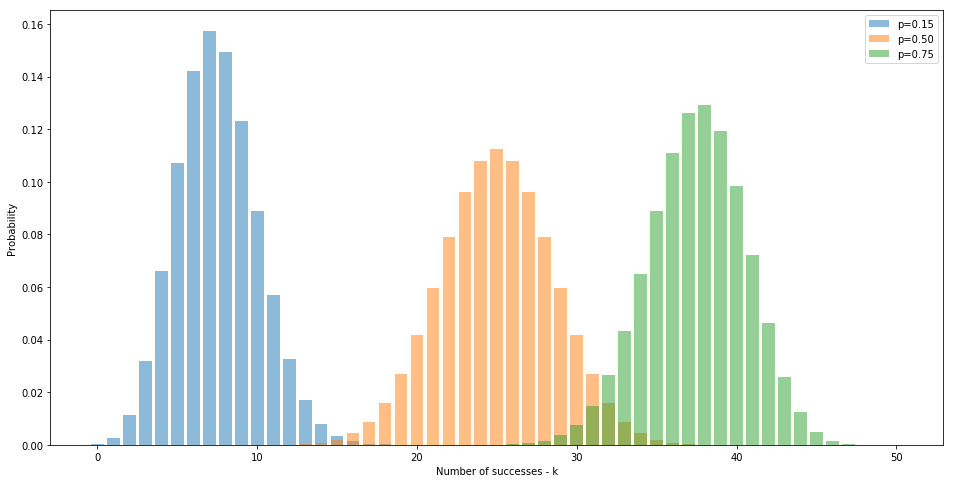

In [4]:
n = 50
bd = binomialDistribution
plt.bar(range(n + 1), [bd(n, k, 0.15) for k in range(n + 1)], alpha=0.5, label='p=0.15')
plt.bar(range(n + 1), [bd(n, k, 0.50) for k in range(n + 1)], alpha=0.5, label='p=0.50')
plt.bar(range(n + 1), [bd(n, k, 0.75) for k in range(n + 1)], alpha=0.5, label='p=0.75')
plt.xlabel('Number of successes - k')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [5]:
def bdTable(n, digits=3, hsteps=0.1):
    bd = binomialDistribution
    P = np.arange(hsteps, 1, hsteps)
    K = range(n + 1)
    steps = {k: ['{0:.{1}f}'.format(bd(n, k, p), digits) for p in P] for k in K}
    df = pd.DataFrame(data=steps).T
    d = int(np.ceil(abs(np.log10(hsteps))))
    df.columns = ['{0:.{1}f}'.format(e, d) for e in P]
    ztable = df.rename_axis('k x p', axis=1)
    return ztable

In [6]:
# Display binomial distribution table
bdtable = bdTable(10, hsteps=0.05)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None):
    display(bdtable)

k x p,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0,0.599,0.349,0.197,0.107,0.056,0.028,0.013,0.006,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.315,0.387,0.347,0.268,0.188,0.121,0.072,0.040,0.021,0.010,0.004,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000
2,0.075,0.194,0.276,0.302,0.282,0.233,0.176,0.121,0.076,0.044,0.023,0.011,0.004,0.001,0.000,0.000,0.000,0.000,0.000
3,0.010,0.057,0.130,0.201,0.250,0.267,0.252,0.215,0.166,0.117,0.075,0.042,0.021,0.009,0.003,0.001,0.000,0.000,0.000
4,0.001,0.011,0.040,0.088,0.146,0.200,0.238,0.251,0.238,0.205,0.160,0.111,0.069,0.037,0.016,0.006,0.001,0.000,0.000
5,0.000,0.001,0.008,0.026,0.058,0.103,0.154,0.201,0.234,0.246,0.234,0.201,0.154,0.103,0.058,0.026,0.008,0.001,0.000
6,0.000,0.000,0.001,0.006,0.016,0.037,0.069,0.111,0.160,0.205,0.238,0.251,0.238,0.200,0.146,0.088,0.040,0.011,0.001
7,0.000,0.000,0.000,0.001,0.003,0.009,0.021,0.042,0.075,0.117,0.166,0.215,0.252,0.267,0.250,0.201,0.130,0.057,0.010
8,0.000,0.000,0.000,0.000,0.000,0.001,0.004,0.011,0.023,0.044,0.076,0.121,0.176,0.233,0.282,0.302,0.276,0.194,0.075
9,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.004,0.010,0.021,0.040,0.072,0.121,0.188,0.268,0.347,0.387,0.315


In [7]:
%%time
# save binomial distribution table as HTML
HTML = '''
<!DOCTYPE html>
<html>
<head>
  <link rel="stylesheet" href="binomial_distribution.css">
</head>
<body>
'''
HTML += '\n<h1>Binomial Distribution Tables</h1>\n'

N = list(range(2, 11)) + [20, 50]
for n in N:
    HTML += '\n<h2>n = {}</h2>\n'.format(n)
    bdtable = bdTable(n, hsteps=0.05)
    HTML += bdtable.to_html()

HTML += '''
</body>
</html>
'''

ztable_html = open('binomial_distribution.html', 'w')
ztable_html.write(HTML)
ztable_html.close()

Wall time: 232 ms
